# Laboratorio 07 Interpolación

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez

##1. Interpolación Lagrange

Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.

 Para este numeral, emplee que:


La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate  import lagrange
from scipy.interpolate import CubicSpline
import pandas as pd

<ipython-input-81-cba1f5069b89>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x,f(x),"b--",color = "#000000")


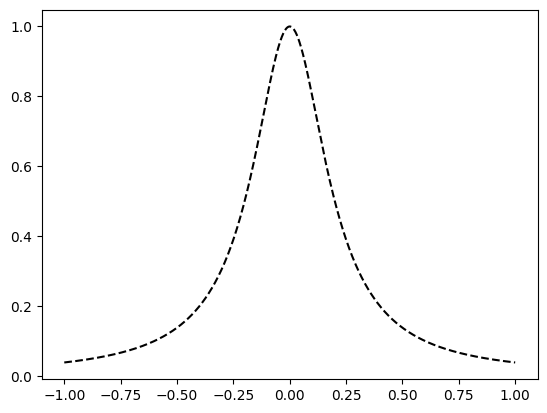

In [81]:
f = lambda x: 1/(1+25*x**2)
x = np.linspace(-1,1,1000)
plt.plot(x,f(x),"b--",color = "#000000")
plt.show()

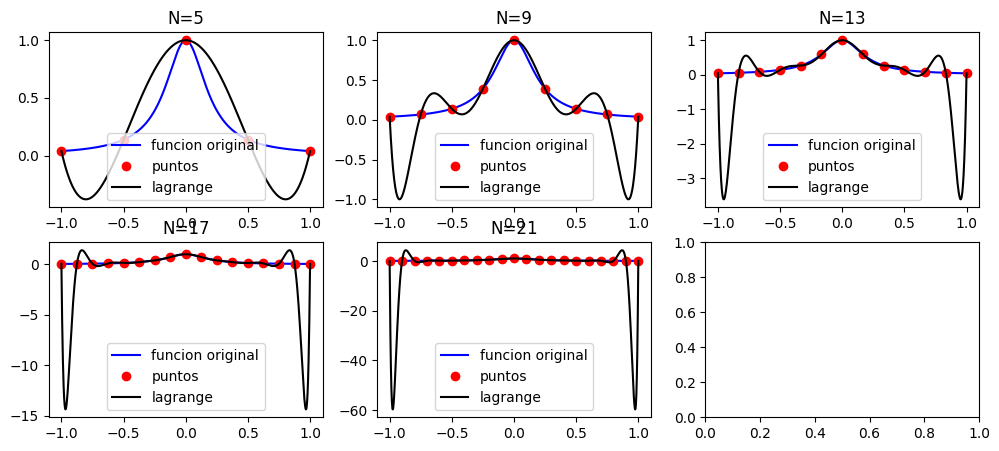

In [82]:
N = np.array([4,8,12,16,20])
fig, axs = plt.subplots(nrows=2,ncols=3,figsize = (12,5))
for i, n in enumerate(N):
  n=n+1
  x_ = np.linspace(-1,1,n)#puntos a interpolar
  PL = lagrange(x_,f(x_))#funcion de interpolacion
  xL = np.linspace(np.min(x_),np.max(x_),1000)
  ax = axs.flatten()
  ax[i].plot(x,f(x),"b-", label= "funcion original")
  ax[i].plot(x_,f(x_),"ro", label = "puntos")
#plt.ylim(0,1)
  ax[i].plot(xL,PL(xL), "k-", label = "lagrange" )
  ax[i].legend()
  ax[i].set_title(f"N={n}")

In [83]:
import sympy as sp
sp.init_printing() #para imprimir en latex

f_s = lambda y: 1/(1+25*y**2)
y = sp.symbols("y")
f_s(y)

    1    
─────────
    2    
25⋅y  + 1

In [84]:
df5 = sp.diff(f_s(y),y,5)
f5 = sp.lambdify(y,df5, "numpy")



-0.04504504504504503

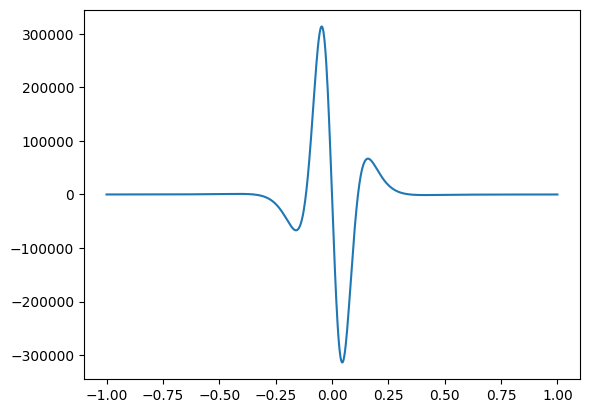

In [85]:
x5 = np.linspace(-1,1,1000)
plt.plot(x5,f5(x5))
plt.show
x_max = np.max(abs(f5(x5)))
x_zeta = np.argmax(abs(f5(x5)))
x5[x_zeta]

In [86]:
import math as mt

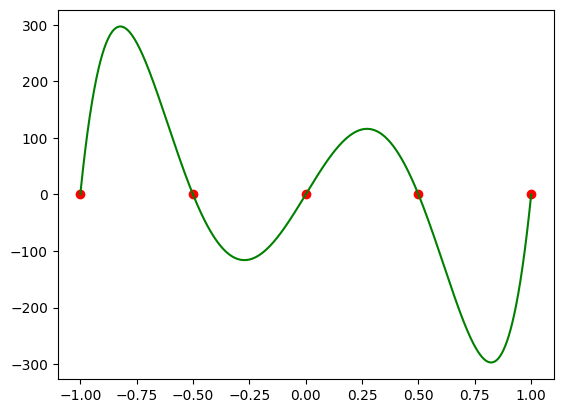

In [87]:
N=4
n=N+1
x__ = np.linspace(-1,1,n)
X2 = np.linspace(np.min(x_),np.max(x_),1000)

plt.plot(x__,f(x__),"ro")
e = x_max/(mt.factorial(n))*(X2-x__[0])*(X2-x__[1])*(X2-x__[2])*(X2-x__[3])*(X2-x__[4])
plt.plot(X2, e, "g-")


##2. Tangente

Para la función $f(x) = \tan (x)$ definida entre $-\frac{\pi}{4}$ y $\frac{\pi}{4}$, usando $N=10$ (9 intervalos). Grafique la función original y aquella interpolada usando Lagrange.

Explore el comportamiento del algoritmo de interpolación lineal al variar el número de datos utilizados.

<ipython-input-88-eab420484674>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x1,f1(x1),"b-",color = "#000000")


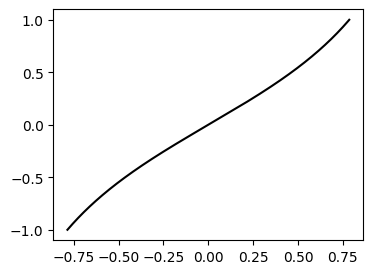

In [88]:
f1 =  lambda x1: np.tan(x1)
x1 = np.linspace(-np.pi/4,np.pi/4,1000)
plt.figure(figsize = (4,3))
plt.plot(x1,f1(x1),"b-",color = "#000000")
plt.show()

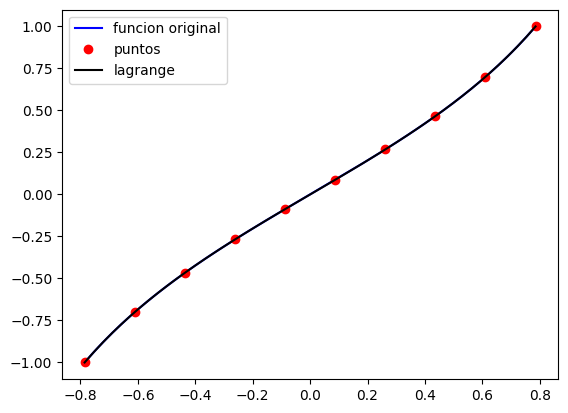

In [89]:
N=9
n =N+1
x_ = np.linspace(-np.pi/4,np.pi/4,n)#puntos a interpolar
PL = lagrange(x_,f1(x_))#funcion de interpolacion
xL = np.linspace(np.min(x_),np.max(x_))
plt.plot(x1,f1(x1),"b-", label= "funcion original")
plt.plot(x_,f1(x_),"ro", label = "puntos")
#plt.ylim(0,1)
plt.plot(xL,PL(xL), "k-", label = "lagrange" )
plt.legend()

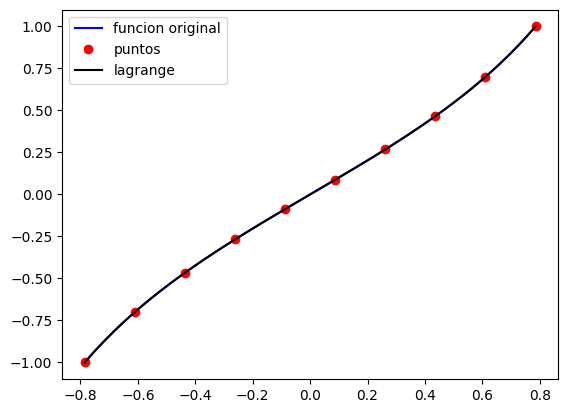

In [90]:
N=9
n =N+1
x_ = np.linspace(-np.pi/4,np.pi/4,n)#puntos a interpolar
PL = CubicSpline(x_,f1(x_))#funcion de interpolacion
xL = np.linspace(np.min(x_),np.max(x_))
plt.plot(x1,f1(x1),"b-", label= "funcion original")
plt.plot(x_,f1(x_),"ro", label = "puntos")
#plt.ylim(0,1)
plt.plot(xL,PL(xL), "k-", label = "lagrange" )
plt.legend()

In [91]:
sp.init_printing()
f1 =  lambda x1: sp.tan(x1)
x1 = sp.symbols("x1")
f1(x1)



tan(x₁)

In [92]:
df10 = sp.diff(f1(x1),x1,10)
f10 = sp.lambdify(x1,df10, "numpy")

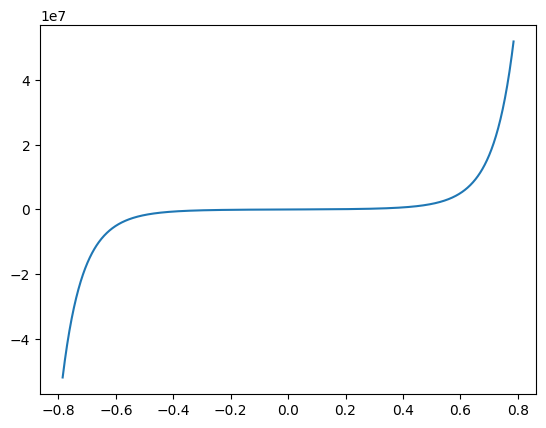

-0.7853981633974483

In [93]:
x10 = np.linspace(-np.pi/4,np.pi/4,1000)
plt.plot(x10,f10(x10))
plt.show()
x_max1 = np.max(abs(f10(x10)))
x_zeta1 = np.argmax(abs(f10(x10)))
x10[x_zeta1]

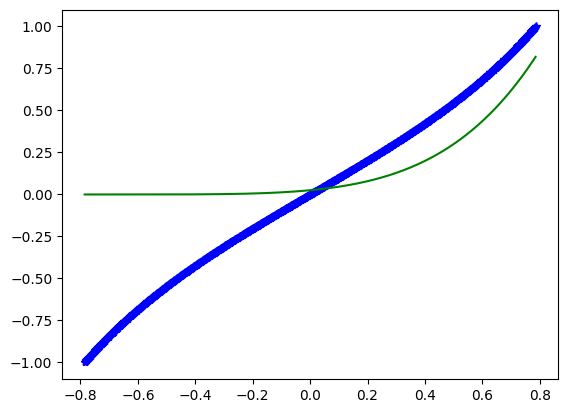

In [100]:
N=9
n=N+1
F = lambda x: np.tan(x)
x = np.linspace(-np.pi/4,np.pi/4,1000)
X3 = np.linspace(np.min(x_),np.max(x_),1000)

plt.plot(x,F(x),"b*")
e = x_max/(mt.factorial(n))*(X3-x[0])*(X3-x[1])*(X3-x[2])*(X3-x[3])*(X3-x[4])
plt.plot(X3, e, "g-")

##3. Datos

Usando los siguientes datos:
```
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
```
a)  Cree un dataframe y utilizando la interpolación de Lagrange encuentre



valores intermedios, esto es,

```
new_x_range = np.arange(1.1, 2.1, 0.1)
```
b) Haga un gráfico donde muestre los valores originales y aquellos interpolados.

c) Utilizando un método diferente a Lagrange repita el procedimiento y explique si hay alguna diferencia


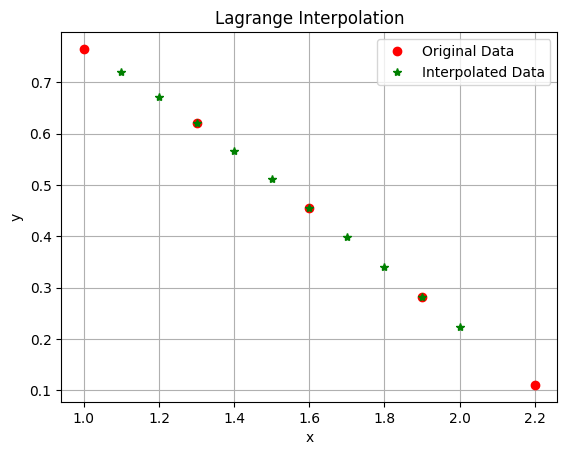

In [ ]:
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

y =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
data ={"x": x,
       "y": y}
new_x_range = np.arange(1.1, 2.1, 0.1)
coma =pd.DataFrame(data)

poly = lagrange(x, y)
interpolacion_evaluada = poly(new_x_range)


df2 = pd.DataFrame(data)
plt.plot(x, y, 'ro', label='Original Data')
plt.plot(new_x_range, interpolacion_evaluada,"g*", label='Interpolated Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Interpolation')
plt.legend()
plt.grid()
plt.show()


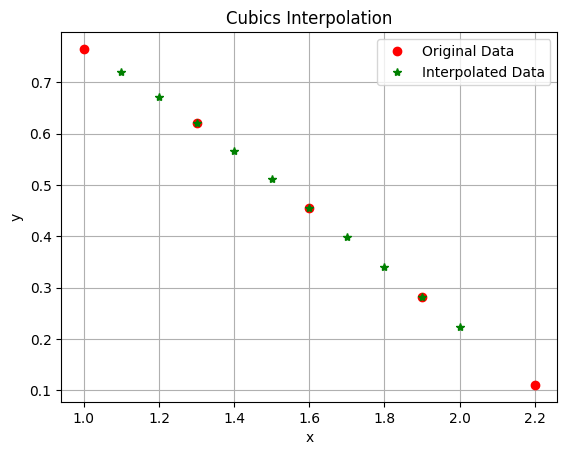

In [ ]:
poly1 = CubicSpline(x,y)
cubics = poly1(new_x_range)

plt.plot(x, y, 'ro', label='Original Data')
plt.plot(new_x_range,cubics ,"g*", label='Interpolated Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubics Interpolation')
plt.legend()
plt.grid()
plt.show()


para este tipo de funcion no existe diferencia alguna ya que no es una funcion lineal que no es compleja de asimilar con estas interpolaciones.


##4. Interpolación en imágenes


# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).




Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

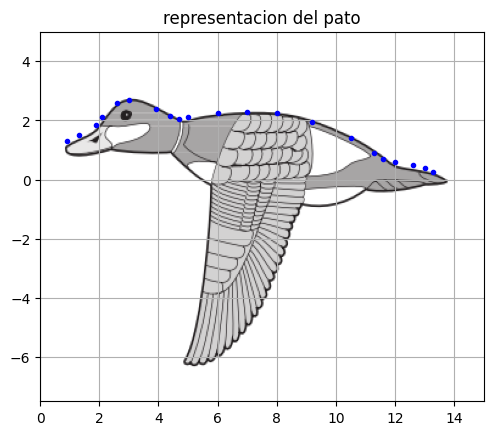

In [ ]:
x = np.array([0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3])
y = np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])
import urllib.request

pato='https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')#Decargar la imagen
imagen_pato=plt.imread('pato.jpg') #Variable con la imagen del pato

plt.figure()
plt.title("representacion del pato")
plt.imshow(imagen_pato, extent=(0.456, 14.2, -6.7, 3.30))
plt.plot(x,y,".b")
plt.xlim(0,15)
plt.ylim(-7.5,5)

plt.grid()


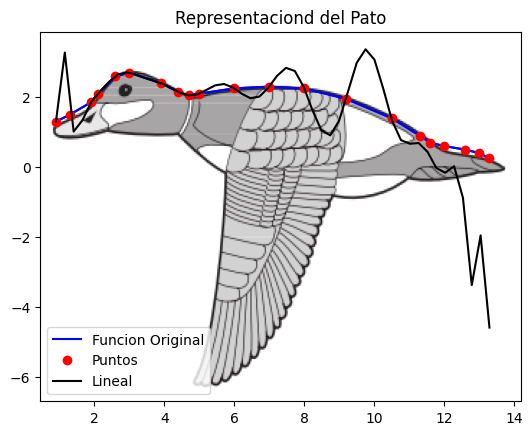

In [ ]:
PL = lagrange(x,y)
Xl = np.linspace(np.min(x), np.max(x))

plt.figure()
plt.title("Representaciond del Pato")
plt.imshow(imagen_pato, extent = (0.45, 14.2, -6.7, 3.30))
plt.plot(x,y,"b")
plt.plot(x, y, "b-", label="Funcion Original")
plt.plot(x, y, "ro", label="Puntos")
plt.plot(Xl, PL(Xl), "k-", label="Lineal")
plt.legend()
plt.show()

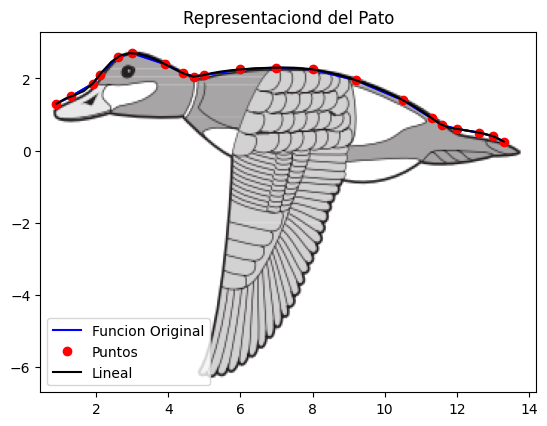

In [ ]:
PL = CubicSpline(x,y)
Xl = np.linspace(np.min(x), np.max(x))
plt.figure()
plt.title("Representaciond del Pato")
plt.imshow(imagen_pato, extent = (0.45, 14.2, -6.7, 3.30))
plt.plot(x,y,"b")
plt.plot(x, y, "b-", label="Funcion Original")
plt.plot(x, y, "ro", label="Puntos")
plt.plot(Xl, PL(Xl), "k-", label="Lineal")
plt.legend()
plt.show()

la interpolacion que presenta oscilaciones es la interpolacion de lagrange, ya que esta solo garantiza una funcion que pasara por cada uno de los puntos, mientras que el Cubispline si garantizara que pasara por cada uno de los puntos sin desviarse de estos.